In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import gensim,os,sklearn,tqdm

from collections import Counter
from datetime import datetime

from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import corpora
from gensim import models

%matplotlib inline

# 1.load data
## load counter data

In [2]:
counter = Counter()


In [3]:
counter_dir="D:/work/fortune_street/002 news_analyze/002 data/003 outcome_data/word_counter_data/"
txt_dir="D:/work/fortune_street/002 news_analyze/002 data/002 corpus_data/token_txt_data/"

list_counter_filenames=list(os.walk(counter_dir))[0][2]
print(list_counter_filenames)
list_txt_source=list(os.walk(txt_dir))[0][1]
print(list_txt_source)

['word_counter.npy', 'word_counter_2019_02_08.npy', 'word_counter_2019_02_12.npy']
['cnbc_news_data', 'oil_price_news_data', 'uk_reuters_news_data']


In [4]:
for counter_file in list_counter_filenames:
    if counter_file.startswith("word_counter"):
        print(counter_dir+counter_file)
        current_counter=np.load(counter_dir+counter_file)
        counter.update(current_counter.tolist())
counter.most_common(10)

D:/work/fortune_street/002 news_analyze/002 data/003 outcome_data/word_counter_data/word_counter.npy
D:/work/fortune_street/002 news_analyze/002 data/003 outcome_data/word_counter_data/word_counter_2019_02_08.npy
D:/work/fortune_street/002 news_analyze/002 data/003 outcome_data/word_counter_data/word_counter_2019_02_12.npy


[('the', 551201),
 ('to', 300006),
 ('in', 245871),
 ('of', 242474),
 ('and', 228839),
 ('a', 215503),
 ('on', 125068),
 ('s', 115873),
 ('by', 114743),
 ('said', 97069)]

## set stopword to top50 most common words

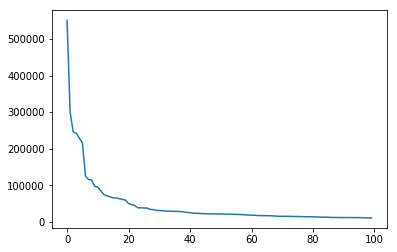

In [5]:
plt.plot([num for word,num in counter.most_common(100)])
plt.show()

In [6]:
len(counter)
counter.most_common(50)

[('the', 551201),
 ('to', 300006),
 ('in', 245871),
 ('of', 242474),
 ('and', 228839),
 ('a', 215503),
 ('on', 125068),
 ('s', 115873),
 ('by', 114743),
 ('said', 97069),
 ('for', 95306),
 ('that', 84778),
 ('is', 74452),
 ('oil', 71212),
 ('percent', 68407),
 ('as', 65788),
 ('from', 65500),
 ('at', 63250),
 ('with', 61918),
 ('it', 59332),
 ('its', 50246),
 ('has', 47244),
 ('was', 44818),
 ('be', 38670),
 ('are', 38586),
 ('have', 37991),
 ('will', 37942),
 ('reuters', 34330),
 ('an', 33487),
 ('this', 31768),
 ('but', 31106),
 ('not', 30777),
 ('which', 30000),
 ('year', 29102),
 ('more', 29015),
 ('crude', 28797),
 ('million', 28680),
 ('after', 28308),
 ('would', 27276),
 ('prices', 25994),
 ('up', 25445),
 ('were', 23805),
 ('he', 23571),
 ('last', 23267),
 ('reporting', 22522),
 ('energy', 22404),
 ('new', 22124),
 ('china', 21956),
 ('also', 21931),
 ('market', 21759)]

In [7]:
temp_stopwords=[word for word, num in counter.most_common(50)]

## load news data

In [8]:
# datefolder="D:/work/fortune_street/002 news_analyze/002 data/002 corpus_data/token_txt_data/cnbc_news_data/2018-12-04/"
# list_news_filenames=list(os.walk(datefolder))[0][2]
# aFilename=list_news_filenames[0]

In [9]:
# aFilepath=datefolder+aFilename
def read_news_txt_file(aFilepath):
    token_list=[]
    with open(aFilepath,"r",encoding='utf8') as f:
        news_title=f.readline()
        line = news_title
        while line :
            line = f.readline()
            token_list.append(line.strip())
    return(news_title,token_list)


In [10]:
# aSource=list_txt_source[0]
full_list=[]
for aSource in list_txt_source:
    for subpath , null , list_news_filenames in tqdm.tqdm(list(os.walk(txt_dir+aSource))[1:]):
        news_publish_date=subpath.split("\\")[1]
        source=subpath.split("\\")[0].split("/")[-1]
        for aFilename in list_news_filenames:
            aFilepath="/".join([subpath, aFilename])
            news_title,news_tokens_list=(read_news_txt_file(aFilepath))
            
            out_dict={'news_publish_date':news_publish_date,
                      'news_title':news_title,
                      'news_tokens_list':news_tokens_list,
                      'source':source}
            full_list.append(out_dict)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 360/360 [00:04<00:00, 85.58it/s]


In [11]:
full_news_df=pd.DataFrame(full_list)
full_news_df.head(10)

,news_publish_date,news_title,news_tokens_list,source
0,2018-12-04,update 3-oil prices skid with global stock mar...,"[singapore, dec, reuters, oil, prices, slumped...",cnbc_news_data
1,2018-12-04,u.s. oil prices slide with global markets on e...,"[singapore, dec, reuters, oil, prices, slipped...",cnbc_news_data
2,2018-12-04,heating oil futures turn negative in post-sett...,"[heating, oil, futures, turn, negative, in, tr...",cnbc_news_data
3,2018-12-04,oil futures fall in post-settlement trade afte...,"[oil, futures, fall, in, trade, after, api, da...",cnbc_news_data
4,2018-12-05,update 1-oil prices dip as stock markets slide...,"[opec, meeting, singapore, dec, reuters, oil, ...",cnbc_news_data
5,2018-12-05,oil prices ease in cautious trading ahead of o...,"[singapore, dec, reuters, oil, prices, dipped,...",cnbc_news_data
6,2018-12-05,"oil prices extend gains, brent crude up by mor...","[oil, prices, extend, gains, brent, crude, up,...",cnbc_news_data
7,2018-12-05,update 5-oil prices fall on global growth conc...,"[singapore, dec, reuters, oil, prices, fell, o...",cnbc_news_data
8,2018-12-05,update 4-oil prices slip on global growth conc...,"[singapore, dec, reuters, oil, prices, fell, o...",cnbc_news_data
9,2018-12-06,"oil firms on drop in us crude stocks, market a...","[decision, singapore, dec, reuters, oil, price...",cnbc_news_data


In [12]:
# aListOfTokens=full_news_df.news_tokens_list[0]
def clean_stop_words(aListOfTokens):
    new_l=[token for token in aListOfTokens if token not in temp_stopwords]
    return(new_l)

In [13]:
full_news_df['news_tokens_list_stripped']=full_news_df.news_tokens_list.apply(clean_stop_words)
full_news_df

,news_publish_date,news_title,news_tokens_list,source,news_tokens_list_stripped
0,2018-12-04,update 3-oil prices skid with global stock mar...,"[singapore, dec, reuters, oil, prices, slumped...",cnbc_news_data,"[singapore, dec, slumped, around, wednesday, p..."
1,2018-12-04,u.s. oil prices slide with global markets on e...,"[singapore, dec, reuters, oil, prices, slipped...",cnbc_news_data,"[singapore, dec, slipped, early, wednesday, we..."
2,2018-12-04,heating oil futures turn negative in post-sett...,"[heating, oil, futures, turn, negative, in, tr...",cnbc_news_data,"[heating, futures, turn, negative, trade, api,..."
3,2018-12-04,oil futures fall in post-settlement trade afte...,"[oil, futures, fall, in, trade, after, api, da...",cnbc_news_data,"[futures, fall, trade, api, data, show, surpri..."
4,2018-12-05,update 1-oil prices dip as stock markets slide...,"[opec, meeting, singapore, dec, reuters, oil, ...",cnbc_news_data,"[opec, meeting, singapore, dec, fell, along, w..."
5,2018-12-05,oil prices ease in cautious trading ahead of o...,"[singapore, dec, reuters, oil, prices, dipped,...",cnbc_news_data,"[singapore, dec, dipped, thursday, tepid, trad..."
6,2018-12-05,"oil prices extend gains, brent crude up by mor...","[oil, prices, extend, gains, brent, crude, up,...",cnbc_news_data,"[extend, gains, brent, than, session, high, ba..."
7,2018-12-05,update 5-oil prices fall on global growth conc...,"[singapore, dec, reuters, oil, prices, fell, o...",cnbc_news_data,"[singapore, dec, fell, wednesday, pulled, down..."
8,2018-12-05,update 4-oil prices slip on global growth conc...,"[singapore, dec, reuters, oil, prices, fell, o...",cnbc_news_data,"[singapore, dec, fell, wednesday, pulled, down..."
9,2018-12-06,"oil firms on drop in us crude stocks, market a...","[decision, singapore, dec, reuters, oil, price...",cnbc_news_data,"[decision, singapore, dec, stabilised, friday,..."


# 2.gensim model
## build dictionary

In [14]:
DICT_FOLDER = "D:/work/fortune_street/002 news_analyze/002 data/003 outcome_data/gemsim_outcome/dictionary/"
CORPUS_FOLDER="D:/work/fortune_street/002 news_analyze/002 data/003 outcome_data/gemsim_outcome/corpus/"
saving_date=datetime.today().date()
print('Folder "{}" will be used to save dictionary and corpus for {}'.format(DICT_FOLDER,saving_date))
if not os.path.exists(CORPUS_FOLDER):
    os.makedirs(CORPUS_FOLDER)
if not os.path.exists(DICT_FOLDER):
    os.makedirs(DICT_FOLDER)

Folder "D:/work/fortune_street/002 news_analyze/002 data/003 outcome_data/gemsim_outcome/dictionary/" will be used to save dictionary and corpus for 2019-02-13


In [15]:
dictionary = corpora.Dictionary(full_news_df.news_tokens_list_stripped)
dictionary.save(os.path.join(DICT_FOLDER, str(saving_date)+'.dict'))  # store the dictionary, for future reference
print(dictionary)
print(dictionary.token2id)

Dictionary(51066 unique tokens: ['', 'about', 'activity', 'added', 'administration']...)


{'': 0, 'about': 1, 'activity': 2, 'added': 3, 'administration': 4, 'again': 5, 'although': 6, 'america': 7, 'american': 8, 'analyst': 9, 'announced': 10, 'api': 11, 'around': 12, 'attention': 13, 'average': 14, 'averaged': 15, 'bank': 16, 'barrel': 17, 'barrels': 18, 'beijing': 19, 'below': 20, 'brent': 21, 'broadly': 22, 'can': 23, 'cents': 24, 'chinese': 25, 'close': 26, 'commodity': 27, 'could': 28, 'council': 29, 'country': 30, 'data': 31, 'deal': 32, 'dec': 33, 'decelerating': 34, 'desirable': 35, 'did': 36, 'disputes': 37, 'donald': 38, 'down': 39, 'drop': 40, 'due': 41, 'during': 42, 'economic': 43, 'economies': 44, 'economy': 45, 'editing': 46, 'employment': 47, 'expected': 48, 'far': 49, 'fiscal': 50, 'followed': 51, 'further': 52, 'futures': 53, 'global': 54, 'gloystein': 55, 'glut': 56, 'gmt': 57, 'goods': 58, 'government': 59, 'growing': 60, 'guidance': 61, 'headwinds': 62, 'henning': 63, 'high': 64, 'his': 65, 'if': 66, 'impact': 67, 'import': 68, 'imported': 69, 'increas

## transform token_list to corpus

## transform with dictionary.doc2bow and save 

In [64]:
corpus = [dictionary.doc2bow(text) for text in full_news_df.news_tokens_list]
corpora.MmCorpus.serialize(CORPUS_FOLDER+str(saving_date)+'.mm', corpus)

## load corpus

In [17]:
corpus = corpora.MmCorpus(CORPUS_FOLDER+str(saving_date)+'.mm')

In [20]:
from gensim import models

tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
for id_num,doc in enumerate(corpus_tfidf[:10]):
    print(id_num,doc)

0 [(1, 0.01820695323826897), (2, 0.06163442069455093), (3, 0.033379197859855166), (4, 0.04324526153471998), (5, 0.055088586362185714), (6, 0.05211169078674858), (7, 0.06174056381924478), (8, 0.053548945353725536), (9, 0.048457856616133915), (10, 0.05043355927955889), (11, 0.09989295268224617), (12, 0.03069290937054796), (13, 0.08173361863289438), (14, 0.04122569043049824), (15, 0.08892291805126895), (16, 0.07886354314520691), (17, 0.18574660425912837), (18, 0.06871657706631888), (19, 0.1005654246226652), (20, 0.04999649797084164), (21, 0.1376733910768566), (22, 0.08496842151231049), (23, 0.0313560183087853), (24, 0.050145354400995074), (25, 0.0403773702765716), (26, 0.0436101868400912), (27, 0.0620405670020857), (28, 0.021364900943293137), (29, 0.07572923076742484), (30, 0.02982466619383695), (31, 0.032931042349386846), (32, 0.032536045364493366), (33, 0.06680058539047945), (34, 0.14272480168478452), (35, 0.14460610173392333), (36, 0.039026078364431484), (37, 0.08109920702522468), (38,

4 [(12, 0.03696775639256785), (16, 0.04749318834604053), (17, 0.0745735237423402), (18, 0.04138248431340282), (21, 0.04145482203742858), (24, 0.12079410415838795), (26, 0.052525837282986695), (32, 0.03918770242635535), (33, 0.08045727232250592), (39, 0.12270827545308216), (43, 0.038635842378274894), (46, 0.004243871740898518), (48, 0.06931738126345188), (53, 0.09079361818606958), (54, 0.05877560844339366), (55, 0.08547871810622935), (56, 0.09111356960045765), (57, 0.07013694338108935), (63, 0.08524410783560579), (70, 0.04390644185355665), (73, 0.07284440111413598), (74, 0.04541366993137351), (85, 0.0738989418337381), (86, 0.14760308930380406), (94, 0.049582926563708864), (97, 0.08345448257153082), (98, 0.04876604417075895), (103, 0.12665133261871422), (105, 0.08652051958408986), (118, 0.06756591997574238), (126, 0.02950199174089661), (130, 0.1092260901929201), (138, 0.06189348485702903), (139, 0.024864146357195062), (147, 0.136350397776698), (148, 0.058069447101069226), (157, 0.0572383

7 [(1, 0.015551717326482225), (2, 0.05264588070718163), (3, 0.02851129691540538), (4, 0.036938529708757675), (5, 0.09410933414378002), (6, 0.04451191113168441), (7, 0.10547308860840676), (8, 0.04573956171436622), (9, 0.041390938861606594), (10, 0.0430785122266099), (11, 0.08532492738854625), (13, 0.0698138846414769), (14, 0.03521348551698304), (15, 0.07595472275243556), (16, 0.0673623705355163), (17, 0.15865799433813263), (18, 0.058695201124184665), (19, 0.08589932846436195), (20, 0.04270519035124931), (21, 0.11759560390945871), (22, 0.07257693562146354), (23, 0.026783170519560952), (24, 0.08566467620089202), (25, 0.06897776258447164), (26, 0.037250235633419726), (27, 0.05299279611281353), (28, 0.018249121411484336), (29, 0.06468515488750186), (30, 0.025475145233433964), (31, 0.02812849877637027), (32, 0.055582213433345476), (33, 0.05705863071327605), (34, 0.1219103351468284), (35, 0.12351727323183476), (36, 0.03333465688312415), (37, 0.06927199331776103), (38, 0.030801948789279946), (

8 [(1, 0.017087753830268216), (2, 0.057845691946194516), (3, 0.03132734558147574), (4, 0.04058693257242195), (5, 0.05170223651895305), (6, 0.04890833365636072), (7, 0.05794531034812085), (8, 0.05025723876478434), (9, 0.045479104282999526), (10, 0.047333358551278244), (11, 0.09375243416482472), (13, 0.0767093723248728), (14, 0.038691506499753836), (15, 0.08345673840340263), (16, 0.07401572321367458), (17, 0.17432857693712644), (18, 0.06449250116707336), (19, 0.09438356859051712), (20, 0.04692316383311983), (21, 0.1292104716759979), (22, 0.0797453286745998), (23, 0.029428532876753195), (24, 0.04706286991140908), (25, 0.07579066684802915), (26, 0.04092942555864614), (27, 0.058226872038843906), (28, 0.02005157936912284), (29, 0.07107408011513963), (30, 0.027991314489620903), (31, 0.030906738633111386), (32, 0.061072045006445114), (33, 0.06269428739296581), (34, 0.13395136708196007), (35, 0.1357170217579432), (36, 0.036627106761085104), (37, 0.0761139586256637), (38, 0.033844244166364376), 

9 [(12, 0.03548332139532387), (16, 0.045586106126527304), (17, 0.03578951725432895), (18, 0.1191623296342078), (21, 0.03979020955774746), (24, 0.05797181704776136), (26, 0.05041666976158191), (33, 0.07722652200187438), (40, 0.05933206979735597), (43, 0.03708442562565196), (46, 0.004073459675067251), (53, 0.08714781336820118), (54, 0.05641548225041693), (55, 0.08204633234472966), (57, 0.06732060440046514), (63, 0.08182114281613675), (70, 0.042143384929036874), (73, 0.06991934455352629), (74, 0.0435900904778752), (76, 0.13291434881991934), (80, 0.08613304093305628), (85, 0.035465770170299636), (95, 0.06339884113995592), (97, 0.05340225313324529), (98, 0.046807850606738005), (100, 0.10534884541062227), (103, 0.060782833190268976), (107, 0.09167743175628504), (118, 0.06485282007409018), (120, 0.07421344048915884), (122, 0.09563237820185172), (126, 0.02831734346082424), (132, 0.04937502451765852), (138, 0.05940816078035243), (139, 0.023865730098516263), (143, 0.03286320807920764), (148, 0.0

## apply lsi modeling
## https://en.wikipedia.org/wiki/Latent_semantic_analysis#Latent_semantic_indexing

In [21]:
lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=100)  # initialize an LSI transformation
corpus_lsi = lsi_model[corpus_tfidf]  # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi
lsi_model.print_topics(10)

[(0,
  '-0.139*"dollar" + -0.136*"trade" + -0.115*"index" + -0.108*"bpd" + -0.105*"markets" + -0.105*"opec" + -0.101*"iran" + -0.100*"rose" + -0.097*"futures" + -0.097*"stocks"'),
 (1,
  '-0.222*"dollar" + 0.202*"bpd" + -0.191*"index" + 0.169*"opec" + 0.159*"iran" + -0.132*"stocks" + 0.126*"saudi" + 0.123*"production" + -0.123*"trade" + -0.121*"shares"'),
 (2,
  '-0.281*"bpd" + -0.267*"opec" + 0.150*"lng" + 0.145*"gas" + -0.142*"barrels" + -0.141*"saudi" + 0.139*"power" + 0.132*"coal" + -0.132*"futures" + -0.128*"barrel"'),
 (3,
  '0.433*"iran" + 0.221*"sanctions" + 0.204*"iranian" + -0.199*"lng" + 0.169*"nuclear" + -0.149*"gas" + 0.145*"tehran" + 0.140*"trump" + -0.123*"rigs" + 0.107*"saudi"'),
 (4,
  '-0.397*"lng" + -0.264*"iran" + -0.243*"tonnes" + -0.209*"imports" + 0.187*"opec" + 0.180*"saudi" + -0.173*"iranian" + -0.148*"sanctions" + -0.121*"korea" + -0.114*"exports"'),
 (5,
  '-0.400*"lng" + -0.294*"saudi" + -0.230*"opec" + 0.202*"rigs" + -0.180*"arabia" + 0.158*"iran" + -0.121*

In [22]:
lda_model = models.LdaMulticore(corpus, id2word=dictionary, num_topics=100)
corpus_lda = lda_model[corpus_tfidf]  # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi
lda_model.print_topics(10)

[(51,
  '0.006*"trade" + 0.004*"had" + 0.004*"states" + 0.004*"government" + 0.004*"" + 0.004*"dollar" + 0.004*"global" + 0.003*"two" + 0.003*"editing" + 0.003*"united"'),
 (33,
  '0.008*"gas" + 0.005*"company" + 0.005*"billion" + 0.004*"over" + 0.004*"editing" + 0.004*"" + 0.004*"lng" + 0.004*"about" + 0.003*"had" + 0.003*"government"'),
 (93,
  '0.006*"than" + 0.005*"" + 0.005*"had" + 0.004*"or" + 0.004*"we" + 0.004*"trade" + 0.004*"company" + 0.003*"editing" + 0.003*"about" + 0.003*"per"'),
 (58,
  '0.004*"venezuela" + 0.004*"" + 0.004*"world" + 0.004*"been" + 0.003*"editing" + 0.003*"about" + 0.003*"or" + 0.003*"two" + 0.003*"over" + 0.003*"gas"'),
 (50,
  '0.009*"coal" + 0.006*"gas" + 0.004*"editing" + 0.004*"fuel" + 0.004*"over" + 0.004*"" + 0.003*"government" + 0.003*"been" + 0.003*"power" + 0.003*"about"'),
 (11,
  '0.005*"or" + 0.005*"" + 0.005*"editing" + 0.004*"had" + 0.004*"about" + 0.003*"their" + 0.003*"over" + 0.003*"some" + 0.003*"could" + 0.003*"diesel"'),
 (15,
  '0.0

In [23]:
data = []
rows = []
cols = []
line_count = 0
for line in corpus_lsi:  # lsi_corpus_total 是之前由gensim生成的lsi向量
    for elem in line:
        rows.append(line_count)
        cols.append(elem[0])
        data.append(elem[1])
    line_count += 1
lsi_sparse_matrix = csr_matrix((data,(rows,cols))) # 稀疏向量
lsi_matrix = lsi_sparse_matrix.toarray()  # 密集向量
# --------------------- 
# 作者：multiangle 
# 来源：CSDN 
# 原文：https://blog.csdn.net/u014595019/article/details/52433754 
# 版权声明：本文为博主原创文章，转载请附上博文链接！

In [24]:
lsi_matrix[:100]

array([[-0.30192536,  0.00478844, -0.13228485, ..., -0.04031512,
         0.0060966 ,  0.02063583],
       [-0.27989506, -0.02937046, -0.10188613, ..., -0.05146506,
         0.0022004 ,  0.03040142],
       [-0.08812585, -0.00154413, -0.08444631, ...,  0.05866961,
         0.05368633,  0.00796867],
       ...,
       [-0.36797222,  0.02426788, -0.1747467 , ..., -0.03640283,
         0.00047287,  0.01171605],
       [-0.34041087, -0.22872644, -0.02251829, ..., -0.00871523,
        -0.02194297, -0.02419834],
       [-0.32568358,  0.09686133, -0.20762592, ...,  0.03024146,
        -0.00814446,  0.01973696]])

# 3.RUN some test
## apply kmeans

In [46]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
pca.fit(lsi_matrix)
# two_dim_lsi=pca.transform(lsi_matrix)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [62]:
from sklearn.cluster import KMeans
kmean_model = KMeans(n_clusters=10)
kmean_model.fit(lsi_matrix)
labels= kmean_model.predict(lsi_matrix)
cluster_centers = kmean_model.cluster_centers_

In [60]:
if cluster_centers.shape[1]==3:
    reshaped_cluster_centers=cluster_centers.reshape(3,-1)
else:
    reshaped_cluster_centers=pca.transform(cluster_centers).reshape(3,-1)
    
reshaped_3_dim_lsi=pca.transform(lsi_matrix).reshape(3,-1)

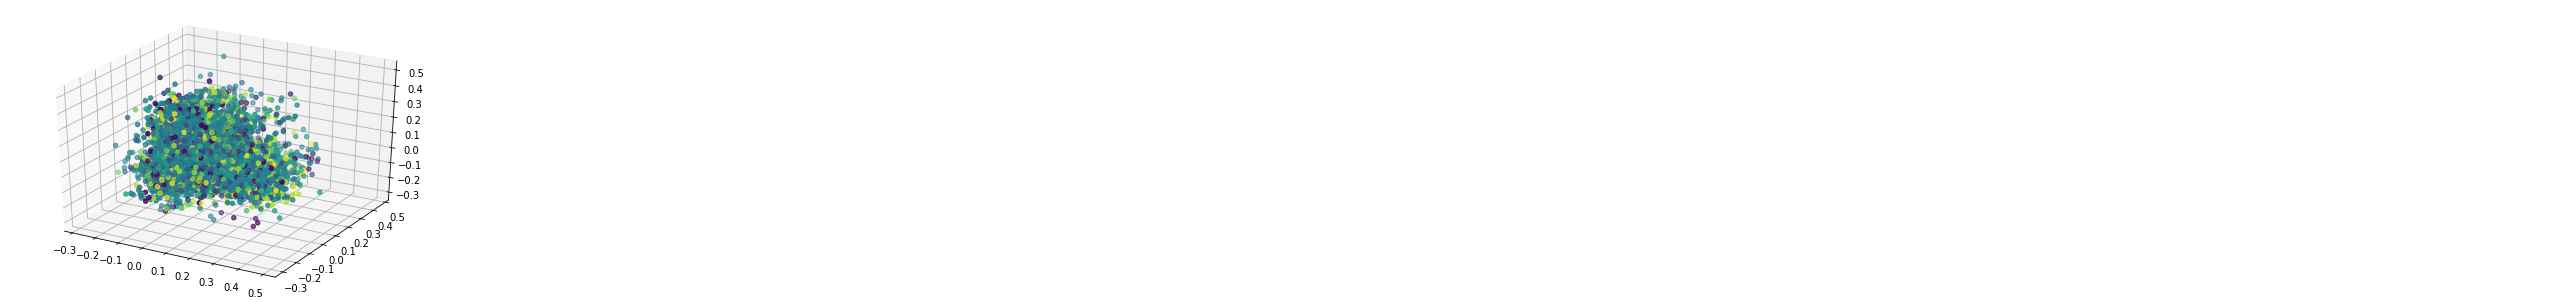

In [63]:
from mpl_toolkits.mplot3d import Axes3D
import random
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(reshaped_cluster_centers[0],reshaped_cluster_centers[1],reshaped_cluster_centers[2],"rD")
ax.scatter(reshaped_3_dim_lsi[0],reshaped_3_dim_lsi[1],reshaped_3_dim_lsi[2],c=labels)


## check similarities

In [25]:
from gensim import similarities

In [33]:
# index = similarities.SparseMatrixSimilarity(corpus_lsi[:50])
index = similarities.MatrixSimilarity(corpus_lsi[:1000])
i = corpus_lsi[50]
sims = index[i]
print(list(enumerate(sims)))

C:\Users\eiahb\AppData\Local\conda\conda\envs\env_futures\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[(0, 0.7805277), (1, 0.6608726), (2, 0.2935977), (3, 0.25671476), (4, 0.7347198), (5, 0.77341956), (6, 0.13049006), (7, 0.7704658), (8, 0.777194), (9, 0.81002134), (10, 0.48845878), (11, 0.23107211), (12, 0.47115135), (13, 0.47384143), (14, 0.21188), (15, 0.1810121), (16, 0.7779103), (17, 0.76520514), (18, 0.6394058), (19, 0.6269007), (20, 0.18166576), (21, 0.6465537), (22, 0.29398325), (23, 0.7272282), (24, 0.65376353), (25, 0.2692591), (26, 0.28252766), (27, 0.6528424), (28, 0.4551865), (29, 0.43089712), (30, 0.80554205), (31, 0.8180978), (32, 0.0), (33, 0.7505729), (34, 0.66189307), (35, 0.27958325), (36, 0.42834577), (37, 0.45318753), (38, 0.21187568), (39, 0.50803035), (40, 0.8393397), (41, 0.89023256), (42, 0.21126746), (43, 0.20416607), (44, 0.75927776), (45, 0.7386775), (46, 0.41676393), (47, 0.7445723), (48, 0.52467334), (49, 0.20934227), (50, 1.0), (51, 0.96878624), (52, 0.9082799), (53, 0.3615485), (54, 0.79326034), (55, 0.55338985), (56, 0.29519087), (57, 0.56419253), (58, 

(array([ 32., 117., 201., 162., 151., 101.,  81.,  94.,  56.,   5.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

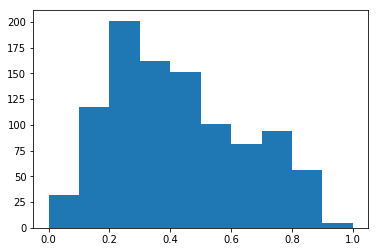

In [34]:
plt.hist(sims)